In [50]:
import numpy as np
import pandas as pd
import requests

In [51]:
df = pd.read_csv("earthquake3.csv")
df

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2.020000e+13,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2.020000e+13,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2.020000e+13,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2.020000e+13,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [53]:
df = df.drop('id',axis=1)

In [54]:
df.head()

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [55]:
df.tail()

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
24002,2017.03.10,12:23:42 AM,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2017.03.10,12:42:44 AM,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2017.04.05,12:08:11 AM,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2017.04.05,12:35:09 AM,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0
24006,2017.04.05,12:25:25 AM,38.63,27.58,turkey,manisa,cavusoglu,NaN,NaN,9.0,3.5,0.0,3.4,3.5,0.0,0.0


In [56]:
df.columns

Index(['date', 'time', 'lat', 'long', 'country', 'city', 'area', 'direction',
       'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

In [57]:
df.sample(5)

,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
19134,2003.11.14,12:56:32 AM,38.89,26.71,turkey,NaN,candarli_korfezi,NaN,NaN,15.0,3.8,3.8,0.0,NaN,0.0,0.0
16464,1990.01.31,12:58:30 AM,39.11,25.92,greece,NaN,midilli_adasi,NaN,NaN,21.0,4.1,0.0,3.8,NaN,0.0,4.1
4689,1999.06.11,12:25:17 AM,39.49,36.67,turkey,sivas,kizilova,east,2.1,9.0,4.8,4.8,0.0,NaN,0.0,0.0
13041,1978.06.21,12:10:13 AM,40.59,23.06,greece,NaN,NaN,NaN,NaN,10.0,3.5,0.0,3.5,NaN,0.0,0.0
18890,2001.11.15,12:15:18 AM,35.42,31.36,mediterranean,NaN,NaN,NaN,NaN,7.0,3.7,3.7,0.0,NaN,0.0,0.0


In [58]:
df.shape

(24007, 16)

In [59]:
df.dtypes

date          object
time          object
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [60]:
df.describe()

,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [61]:
df.describe(include='object')

,date,time,country,city,area,direction
count,24007,24007,24007,11754,12977,10062
unique,12218,3594,26,93,5321,8
top,2011.10.23,12:00:01 AM,turkey,mugla,girit_adasi,north_west
freq,78,27,11850,1095,452,2019


In [62]:
df['time']

0        12:17:44 AM
1        12:03:08 AM
2        12:41:37 AM
3        12:31:45 AM
4        12:57:38 AM
            ...     
24002    12:23:42 AM
24003    12:42:44 AM
24004    12:08:11 AM
24005    12:35:09 AM
24006    12:25:25 AM
Name: time, Length: 24007, dtype: object

In [63]:
df.nunique()

date         12218
time          3594
lat           1189
long          2539
country         26
city            93
area          5321
direction        8
dist           261
depth          812
xm              44
md              46
richter         44
mw              46
ms              50
mb              48
dtype: int64

In [64]:
df['city'].value_counts().head(5)

mugla        1095
van           900
izmir         700
kutahya       687
canakkale     525
Name: city, dtype: int64

In [65]:
#for selecting the multiple columns and printing it
numeric_data=df[['long','dist','depth']].head(5)
numeric_data

,long,dist,depth
0,40.38,0.1,10.0
1,30.09,0.1,5.2
2,27.61,0.1,0.0
3,36.44,0.1,10.0
4,30.24,0.1,7.0


In [66]:
#for selecting specific rows and columns
#DataFrameName.loc[from_this_row:to_this_row,['column1','column2']]
df.loc[3:6,['dist','long']]

,dist,long
3,0.1,36.44
4,0.1,30.24
5,0.1,27.75
6,0.1,43.61


In [67]:
#for selection the single cell from a specific row and column
df.loc[100,'lat']

39.88

In [68]:
#for selecting a row values of a specified row
df.loc[100,:]

date            2004.02.07
time           12:53:16 AM
lat                  39.88
long                 29.21
country             turkey
city                 bursa
area         alpagut_keles
direction             west
dist                   0.3
depth                  8.0
xm                     3.5
md                     0.0
richter                3.5
mw                     NaN
ms                     0.0
mb                     0.0
Name: 100, dtype: object

In [69]:
#for selecting all column values of a specific columns
df.loc[:,'lat'].head(5)

0    39.04
1    40.79
2    38.58
3    39.47
4    40.80
Name: lat, dtype: float64

In [70]:
#false means the value is present and true means it has null value
df['dist'].isna().sample(5)

2160     False
5066     False
18673     True
23086     True
11477     True
Name: dist, dtype: bool

In [71]:
#get all the columns that has more than 66% null values
df.loc[:,df.isna().sum() > 0.60 * df.shape[0]].columns

Index(['mw'], dtype='object')

In [72]:

# Combine "Date(YYYY/MM/DD)" and "Time(UTC)" into a single column and convert to datetime
df['DateTime'] = pd.to_datetime(df['date'] + ' ' + df['time'])

# Drop the original "Date(YYYY/MM/DD)" and "Time(UTC)" columns
df = df.drop(["date", "time"], axis=1)

# Reorder columns to have "DateTime" as the first column
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]

display(df)

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2003-05-20 00:17:44,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2007-08-01 00:03:08,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1978-05-07 00:41:37,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,1997-03-22 00:31:45,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2000-04-02 00:57:38,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,2017-03-10 00:23:42,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,2017-03-10 00:42:44,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,2017-04-05 00:08:11,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,2017-04-05 00:35:09,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


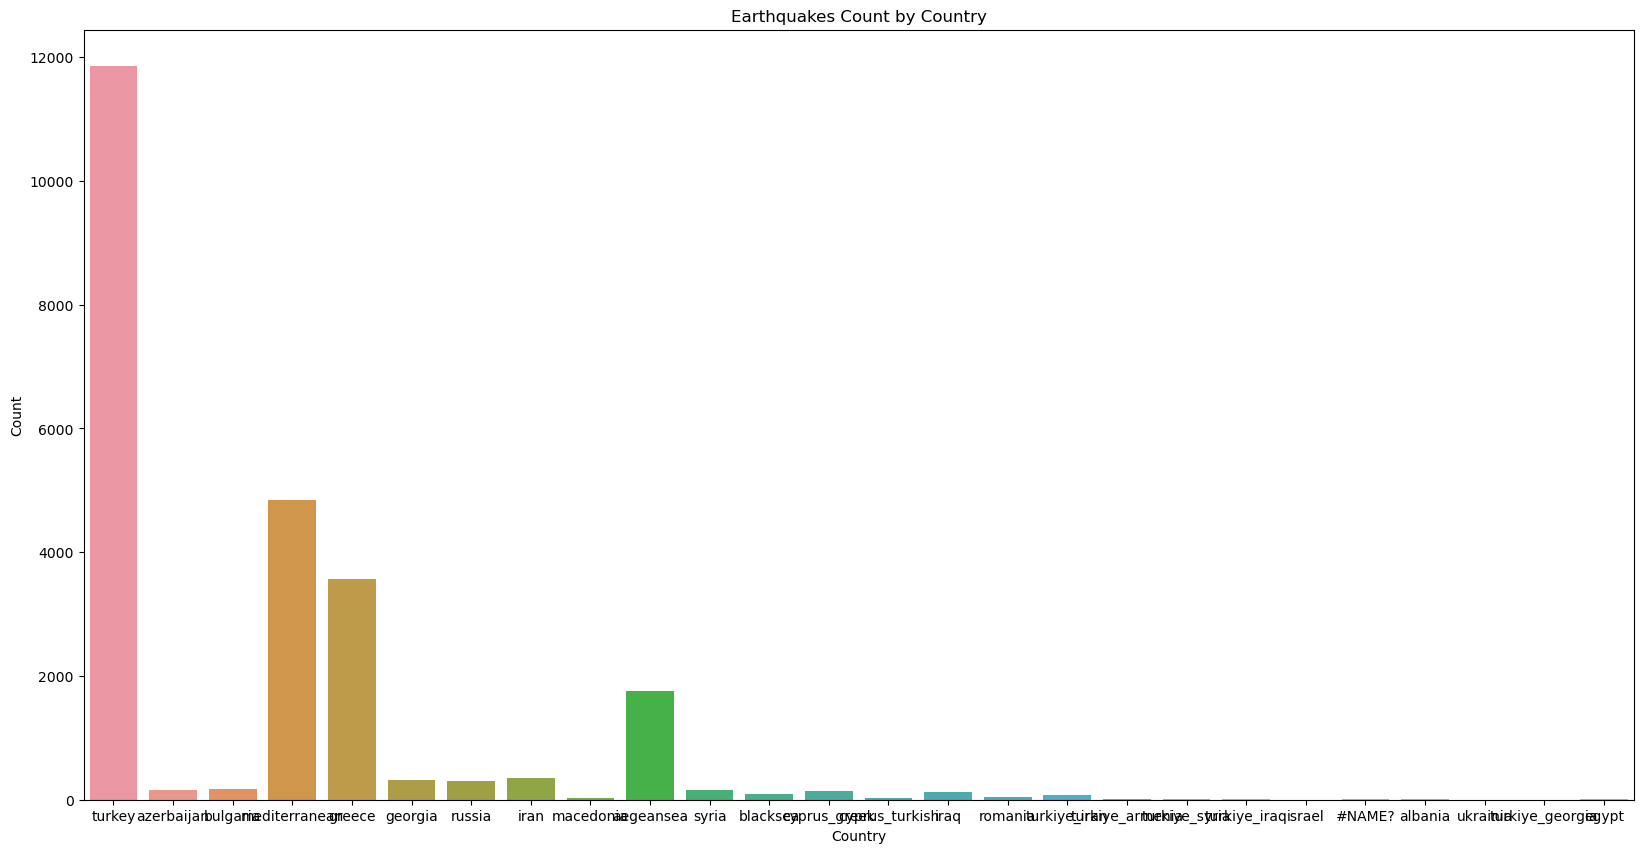

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Categorical data - Bar chart
plt.figure(figsize=(20,10))
sns.countplot(x='country', data=df)
plt.title('Earthquakes Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

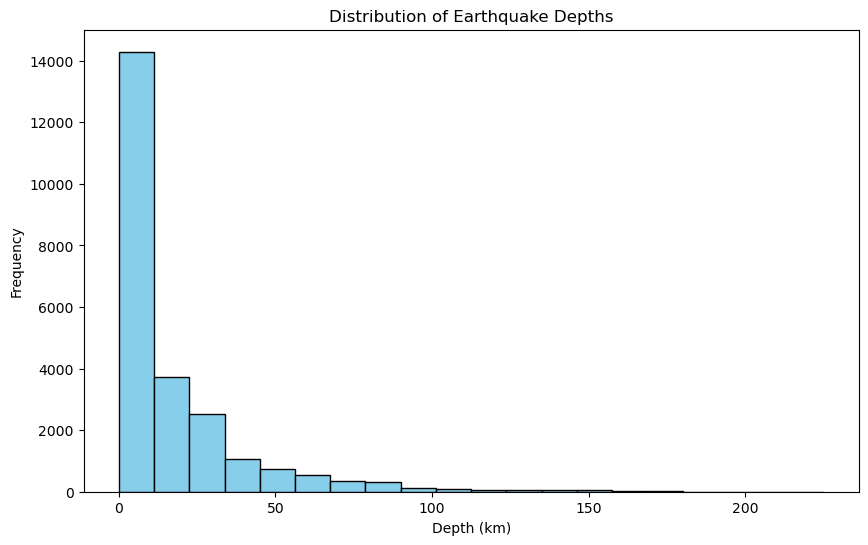

In [74]:
# Depth Analysis - Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['depth'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

In [75]:
df.dtypes

DateTime     datetime64[ns]
lat                 float64
long                float64
country              object
city                 object
area                 object
direction            object
dist                float64
depth               float64
xm                  float64
md                  float64
richter             float64
mw                  float64
ms                  float64
mb                  float64
dtype: object

In [76]:
# Convert the "DateTime" column to float
df['DateTime'] = df['DateTime'].apply(lambda x: x.timestamp())

# Display the DataFrame
display(df)

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,1.053390e+09,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,1.185927e+09,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,2.633497e+08,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,8.589907e+08,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,9.546371e+08,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,1.489105e+09,37.50,38.48,turkey,adiyaman,kirmacik_samsat,NaN,NaN,13.0,4.2,0.0,4.2,4.0,0.0,0.0
24003,1.489107e+09,40.47,35.84,turkey,amasya,kizoglu,NaN,NaN,5.6,3.6,0.0,3.5,3.6,0.0,0.0
24004,1.491351e+09,38.63,27.57,turkey,manisa,cavusoglu,NaN,NaN,10.6,4.1,0.0,4.0,4.1,0.0,0.0
24005,1.491353e+09,38.65,27.55,turkey,manisa,cavusoglu,NaN,NaN,8.7,3.8,0.0,3.6,3.8,0.0,0.0


In [77]:
df.dtypes

DateTime     float64
lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [78]:
import plotly.express as px
px.scatter(df,y='xm', color="direction")

In [79]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

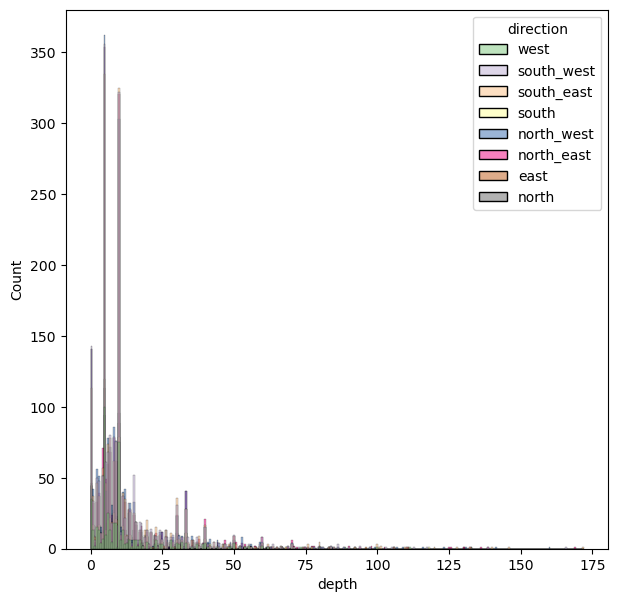

In [80]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

In [81]:
from sklearn import preprocessing
# Data Encoding
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

DateTime     float64
lat          float64
long         float64
country        int32
city           int32
area           int32
direction      int32
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
dtype: object

In [82]:
df.isnull().sum()

DateTime         0
lat              0
long             0
country          0
city             0
area             0
direction        0
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

In [83]:
from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.impute import SimpleImputer
import numpy as np

# Assuming df is your DataFrame
imputer = SimpleImputer(strategy="mean")

# Filling missing values for 'dist' column
df['dist'] = imputer.fit_transform(df[['dist']])

# Filling missing values for 'mw' column
df['mw'] = imputer.fit_transform(df[['mw']])

# Checking for any remaining missing values
print(df.isnull().sum())


DateTime     0
lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
dtype: int64


<Figure size 700x700 with 0 Axes>

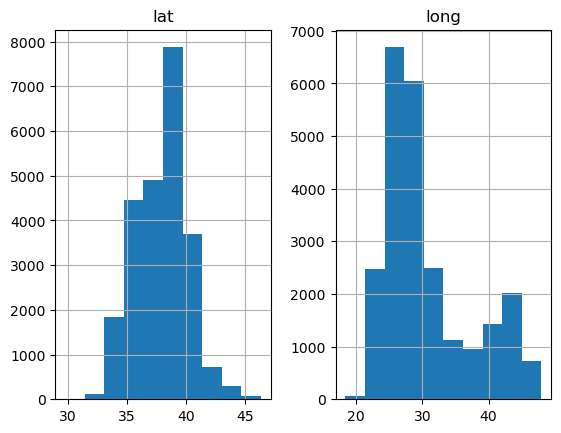

In [84]:
plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_22012\3879995472.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='xm', ylabel='Density'>

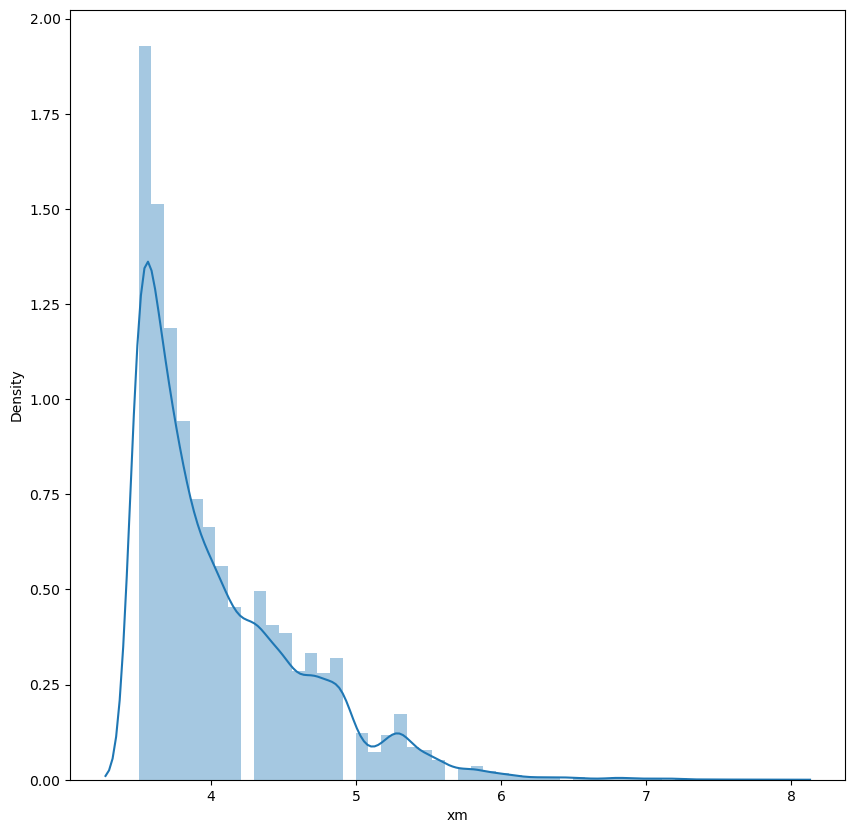

In [85]:
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

Text(0, 0.5, 'ms')

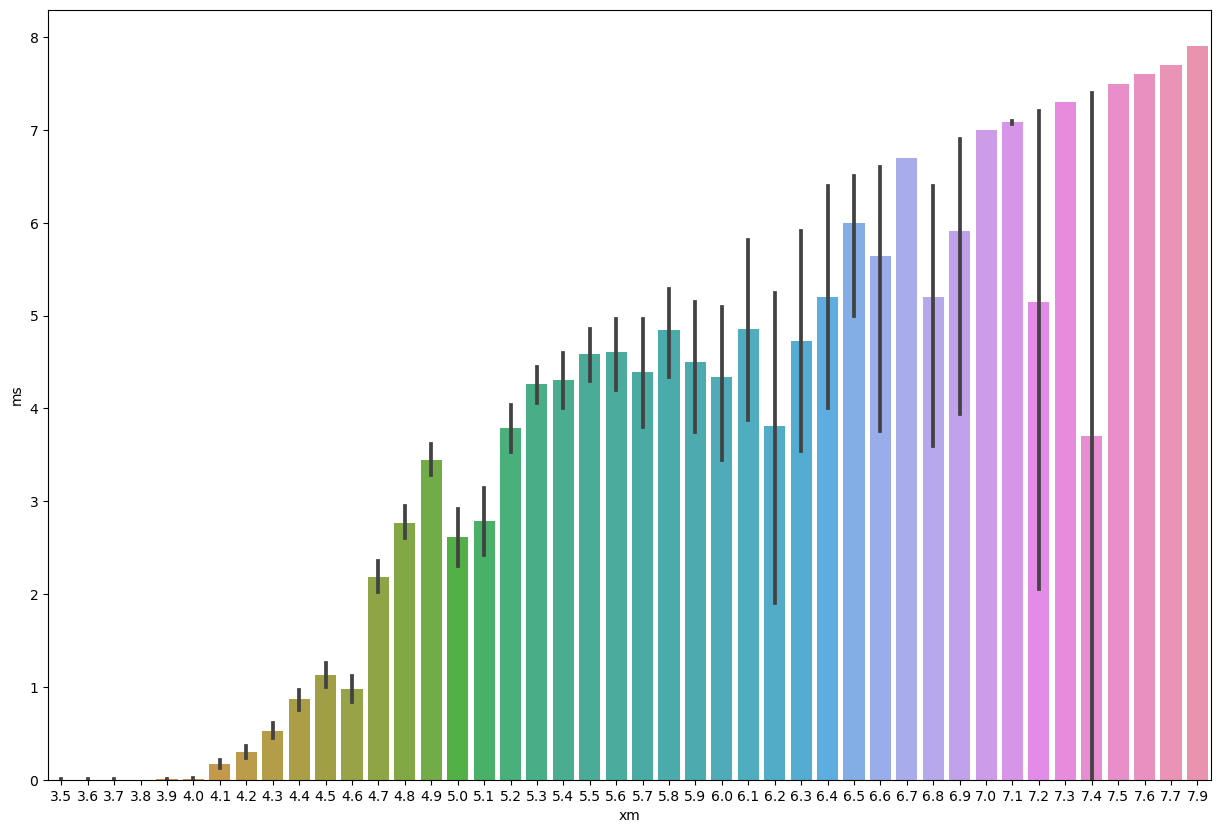

In [86]:

plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

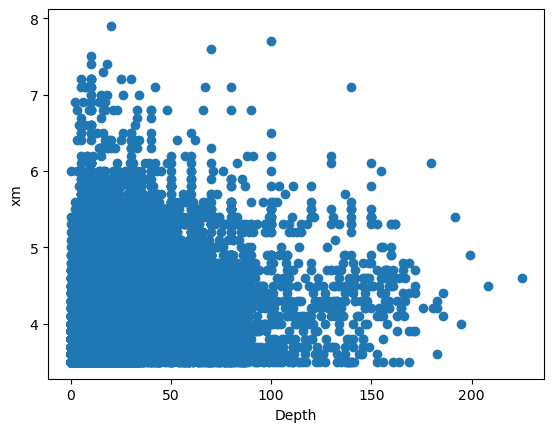

In [87]:

plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

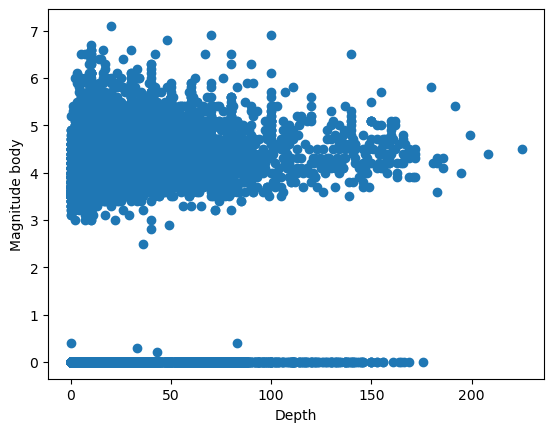

In [88]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

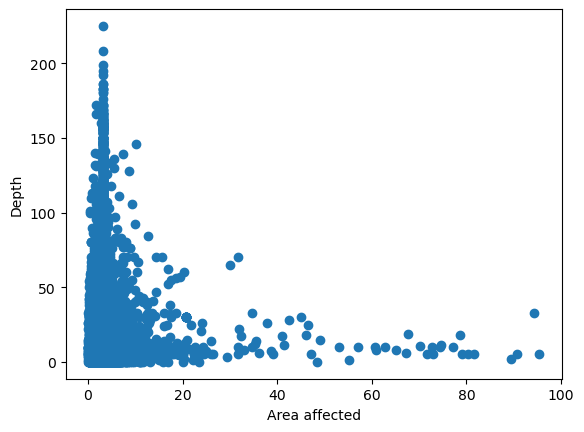

In [89]:

plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.show()

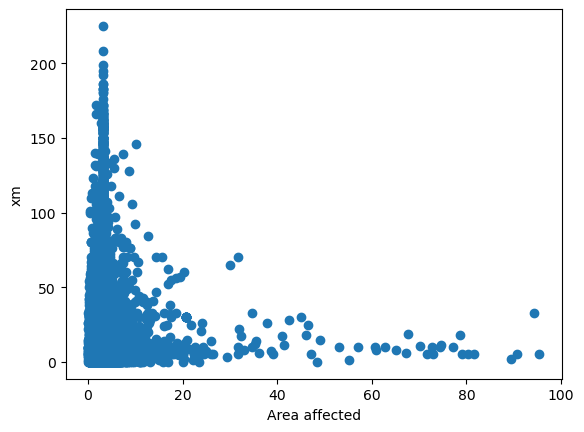

In [90]:

plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("xm")
plt.show()

In [91]:

most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
ms           0.699579
mb           0.628382
richter      0.426653
mw           0.420695
depth        0.302926
md           0.241432
area         0.125275
city         0.107436
direction    0.087696
long         0.071856
dist         0.002853
lat         -0.010347
country     -0.056115
DateTime    -0.542092
Name: xm, dtype: float64

In [92]:
# Using MinMaxScaler
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head(20)


,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.866875,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.906252,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.632149,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.809118,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.837535,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000
5,0.882585,0.443709,0.317262,0.76,0.720430,0.289043,0.750,0.0,0.145778,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
6,0.952176,0.542444,0.851989,0.76,0.946237,0.488630,0.750,0.0,0.041778,0.227273,0.000000,0.625000,0.581685,0.0,0.000000
7,0.722636,0.583384,0.325017,0.76,0.118280,0.306145,0.625,0.0,0.115556,0.068182,0.513514,0.000000,0.581685,0.0,0.000000
8,0.836122,0.620710,0.530344,0.76,0.580645,0.616613,0.625,0.0,0.004444,0.068182,0.513514,0.000000,0.581685,0.0,0.000000
9,0.946016,0.543046,0.849629,0.76,0.946237,0.285849,0.625,0.0,0.013778,0.181818,0.000000,0.583333,0.581685,0.0,0.605634


splitting the data into x and y

In [93]:
y = np.array(df['xm'])
X = np.array(df[['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth']])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

Random forest regression model

In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy1 = r2_score(y_test, y_pred)
mse_of_random_forest = mean_squared_error(y_test, y_pred)
rmse_of_random_forest = np.sqrt(mse_of_random_forest)
mae_of_random_forest = mean_absolute_error(y_test, y_pred)

print(f"R^2: {accuracy1:.4f}")
print(f"MSE: {mse_of_random_forest:.4f}")
print(f"RMSE: {rmse_of_random_forest:.4f}")
print(f"MAE: {mae_of_random_forest:.4f}")

R^2: 0.5046
MSE: 0.0084
RMSE: 0.0917
MAE: 0.0667


In [95]:

new_data = {
    'DateTime': '0.735034',  
    'lat': 0.625, 
    'long': 0.437, 
    'country': 0.532,  
    'city': 0.678, 
    'area': 0.345,  
    'direction': 0.789,  
    'dist': 0.456,  
    'depth': 0.123  
}

# Create a DataFrame with the new data
df_new = pd.DataFrame(new_data, index=[0])

# Scale the new data using the MinMaxScaler
scaler = preprocessing.MinMaxScaler()
df_new_scaled = scaler.fit_transform(df_new)

# Make the prediction using the trained model
prediction = rf_model.predict(df_new_scaled)

print(f"Predicted magnitude: {prediction[0]:.4f}")


Predicted magnitude: 0.3316


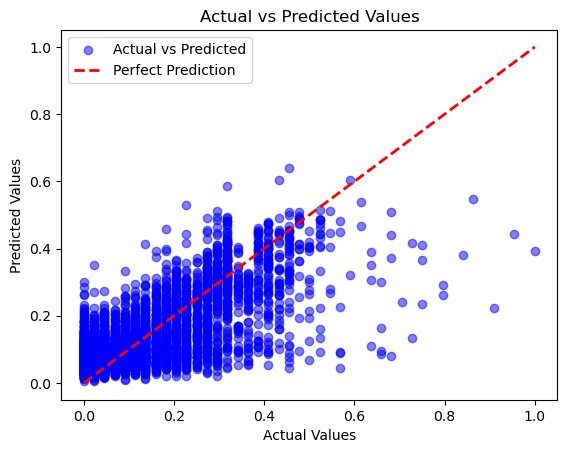

In [96]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values with different colors
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Linear Regression model

In [97]:
import time
from sklearn.linear_model import LinearRegression
start1 = time.time()
linear=LinearRegression()
linear.fit(X_train,y_train)
ans1 = linear.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [98]:
accuracy2=linear.score(X_test,y_test)
print("Accuracy of Linear Regression model is:",accuracy2)

Accuracy of Linear Regression model is: 0.3642021827917393


In [99]:
from sklearn import metrics
print("Linear Regression")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

Linear Regression
Mean Absolute Error: 0.0785606217023499
Mean Squared Error: 0.010793168984870418
Root Mean Squared Error: 0.10389017751871646


Grpah of Actual value and the predicted value

Text(0, 0.5, 'Predicted Magnitude')

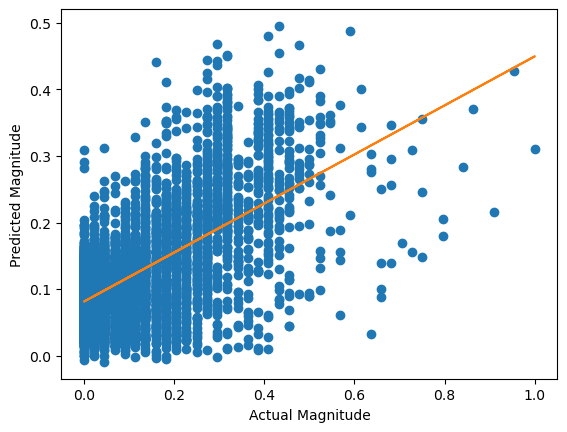

In [100]:
plt.plot(y_test, ans1, 'o')
m, b = np.polyfit(y_test,ans1, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

Support Vector Regression

In [101]:
from sklearn.svm import SVR
# Create a Support Vector Regression model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Calculate evaluation metrics
mse_SVR = mean_squared_error(y_test, y_pred)
accuracy3 = r2_score(y_test, y_pred)
mae_SVR = mean_absolute_error(y_test, y_pred)
rmse_SVR = np.sqrt(mse_SVR)

# Print the metrics
print(f"Mean Squared Error: {mse_SVR:.4f}")
print(f"R-squared: {accuracy3:.4f}")
print(f"Mean Absolute Error: {mae_SVR:.4f}")
print(f"Root Mean Squared Error: {rmse_SVR:.4f}")

Mean Squared Error: 0.0092
R-squared: 0.4562
Mean Absolute Error: 0.0746
Root Mean Squared Error: 0.0961


Decision tree Regression

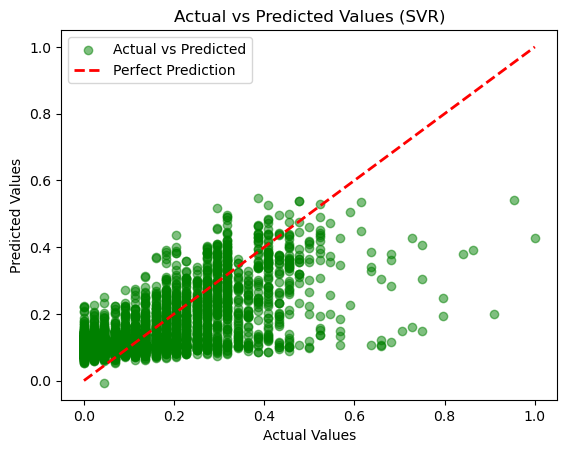

In [102]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values with different colors
plt.scatter(y_test, y_pred, color='green', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Values (SVR)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [103]:

from sklearn.tree import DecisionTreeRegressor
start11 = time.time()
regressor = DecisionTreeRegressor(random_state = 40)
regressor.fit(X_train,y_train)
ans11 = regressor.predict(X_test)
end11 = time.time()
t3 = end11-start11

In [104]:

accuracy11=regressor.score(X_test,y_test)
print("Accuracy of Decision Tree model is:",accuracy11)

Accuracy of Decision Tree model is: 0.08062012269689356


KNN model

In [105]:
from sklearn.neighbors import KNeighborsRegressor
start3 = time.time()
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)
end3 = time.time()
t3 = end3-start3

In [106]:
accuracy5=knn.score(X_test,y_test)
print("Accuracy of KNN model is:",accuracy5)

Accuracy of KNN model is: 0.4310835597578261


In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, ans3))
print('MSE:', metrics.mean_squared_error(y_test, ans3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ans3)))

MAE: 0.07082118561710399
MSE: 0.009657804905287014
RMSE: 0.0982741314145641


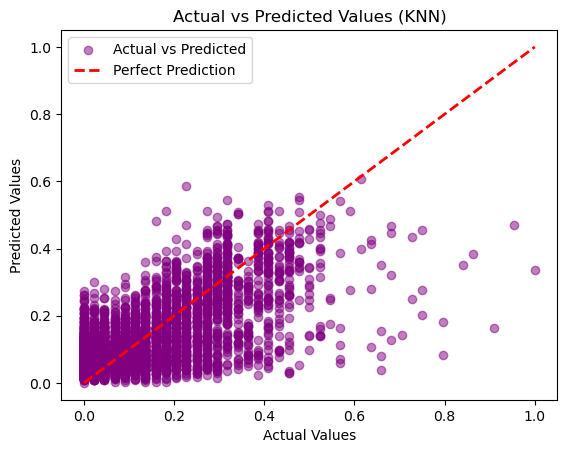

In [108]:
# Plotting the actual vs predicted values with different colors
plt.scatter(y_test, ans3, color='purple', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Values (KNN)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Gradient Boosting Regressor model

In [109]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
accuracy6 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the metrics
print(f"MSE: {mse:.4f}")
print(f"R^2: {accuracy6:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MSE: 0.0084
R^2: 0.5026
MAE: 0.0673
RMSE: 0.0919


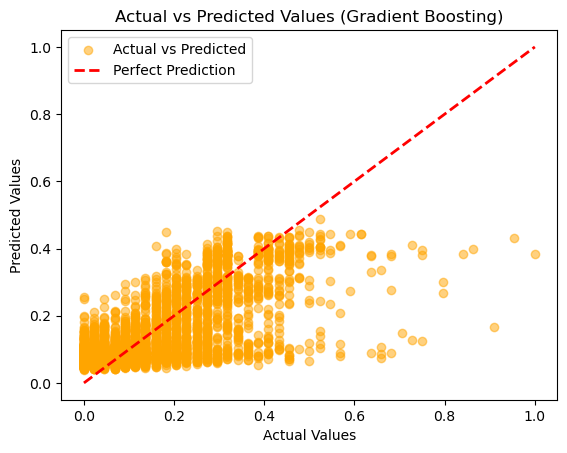

In [110]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values with different colors
plt.scatter(y_test, y_pred, color='orange', alpha=0.5, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


In [111]:
models = ["random forest","linear regression","support vector","knn","Gradient boosting"]
accuracies = [accuracy1,accuracy2,accuracy3,accuracy5,accuracy6]

Text(0.5, 1.0, 'Accuracy Comparison Graph of different model for predicting the earthquake prediction')

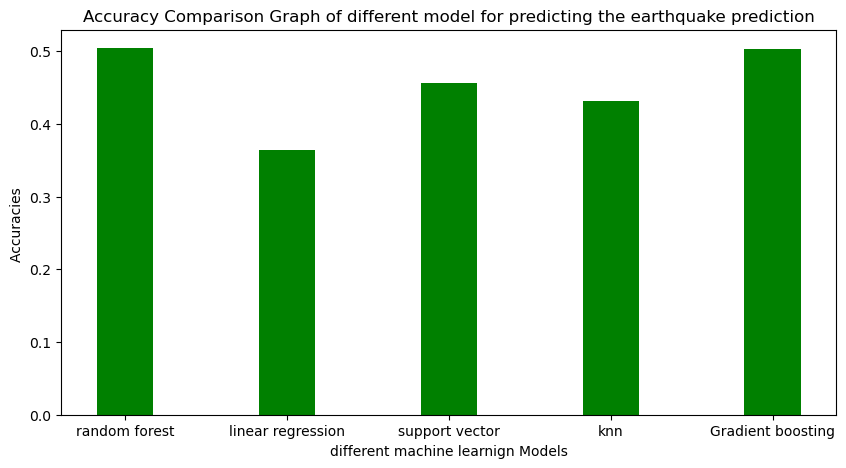

In [112]:
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color ='green',width = 0.35)
plt.xlabel("different machine learnign Models")
plt.ylabel("Accuracies ")
plt.title("Accuracy Comparison Graph of different model for predicting the earthquake prediction")

In [113]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPRegressor
# from sklearn.metrics import mean_absolute_error, r2_score



# # Extract features (X) and target variable (y)
# y = np.array(df['xm'])
# X = np.array(df[['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth']])

# # Standardize features
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# # Build the neural network using MLPRegressor
# model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)

# # Train the model
# model.fit(X_train, y_train)

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error on the test set:", mae)

# # Calculate R-squared
# r_squared = r2_score(y_test, y_pred)
# print("R-squared on the test set:", r_squared)


In [114]:

# # Extract features (X) and target variable (y)
# y_depth = df['depth']
# y_magnitude = df['xm']
# X = np.array(df[['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist']])

# # Split the data into training and testing sets for depth prediction
# X_train_depth, X_test_depth, y_train_depth, y_test_depth = train_test_split(X, y_depth, test_size=0.2, random_state=2)

# # Split the data into training and testing sets for magnitude prediction
# X_train_magnitude, X_test_magnitude, y_train_magnitude, y_test_magnitude = train_test_split(X, y_magnitude, test_size=0.2, random_state=2)

# # Build and train the Random Forest Regression model for depth prediction
# depth_model = RandomForestRegressor(random_state=42)
# depth_model.fit(X_train_depth, y_train_depth)

# # Predict on the test set for depth prediction
# y_pred_depth = depth_model.predict(X_test_depth)

# # Evaluate the depth model
# mse_depth = mean_squared_error(y_test_depth, y_pred_depth)
# r2_depth = r2_score(y_test_depth, y_pred_depth)
# print("Depth Model - Mean Squared Error:", mse_depth)
# print("Depth Model - R-squared:", r2_depth)

# # Build and train the Random Forest Regression model for magnitude prediction
# magnitude_model = RandomForestRegressor(random_state=42)
# magnitude_model.fit(X_train_magnitude, y_train_magnitude)

# # Predict on the test set for magnitude prediction
# y_pred_magnitude = magnitude_model.predict(X_test_magnitude)

# # Evaluate the magnitude model
# mse_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude)
# r2_magnitude = r2_score(y_test_magnitude, y_pred_magnitude)
# print("\nMagnitude Model - Mean Squared Error:", mse_magnitude)
# print("Magnitude Model - R-squared:", r2_magnitude)


In [115]:
df

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.866875,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.000000,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.906252,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.000000,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.632149,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.000000,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.809118,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.000000,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.837535,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.000000,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,0.996329,0.467188,0.679029,0.76,0.010753,0.602706,1.000,0.032267,0.057778,0.159091,0.000000,0.583333,0.519481,0.0,0.000000
24003,0.996329,0.645996,0.590020,0.76,0.053763,0.615486,1.000,0.032267,0.024889,0.022727,0.000000,0.486111,0.467532,0.0,0.000000
24004,0.996996,0.535220,0.311194,0.76,0.677419,0.223642,1.000,0.032267,0.047111,0.136364,0.000000,0.555556,0.532468,0.0,0.000000
24005,0.996996,0.536424,0.310519,0.76,0.677419,0.223642,1.000,0.032267,0.038667,0.068182,0.000000,0.500000,0.493506,0.0,0.000000


In [116]:
import numpy as np
from scipy.stats import zscore

# Assuming df is your DataFrame
columns_to_check = ['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb']

# Calculate Z-scores for selected columns
z_scores = np.abs(zscore(df[columns_to_check]))

# Set a threshold for outliers (you can adjust this threshold based on your preferences)
threshold = 3

# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Extract the rows and columns where outliers are located
outlier_rows = outlier_indices[0]
outlier_columns = outlier_indices[1]

# Print the indices of the outliers
print("Outlier Indices:")
for row, col in zip(outlier_rows, outlier_columns):
    print(f"Row {row}, Column {columns_to_check[col]}")

# You can also create a new DataFrame with outliers removed
df_no_outliers = df.drop(outlier_rows)


Outlier Indices:
Row 57, Column mw
Row 76, Column mw
Row 111, Column xm
Row 111, Column mw
Row 111, Column ms
Row 134, Column DateTime
Row 167, Column xm
Row 188, Column depth
Row 275, Column mw
Row 345, Column depth
Row 378, Column DateTime
Row 464, Column DateTime
Row 464, Column xm
Row 464, Column mw
Row 464, Column ms
Row 465, Column xm
Row 465, Column ms
Row 467, Column xm
Row 467, Column ms
Row 483, Column xm
Row 483, Column mw
Row 489, Column DateTime
Row 530, Column xm
Row 530, Column ms
Row 569, Column mw
Row 575, Column depth
Row 628, Column DateTime
Row 629, Column DateTime
Row 630, Column DateTime
Row 631, Column DateTime
Row 632, Column DateTime
Row 633, Column DateTime
Row 634, Column DateTime
Row 635, Column DateTime
Row 636, Column DateTime
Row 637, Column DateTime
Row 638, Column DateTime
Row 639, Column DateTime
Row 640, Column DateTime
Row 641, Column DateTime
Row 642, Column DateTime
Row 643, Column DateTime
Row 644, Column DateTime
Row 645, Column DateTime
Row 646,

In [117]:
df_no_outliers

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.866875,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.000000,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.906252,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.000000,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.632149,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.000000,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.809118,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.000000,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.837535,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.000000,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24002,0.996329,0.467188,0.679029,0.76,0.010753,0.602706,1.000,0.032267,0.057778,0.159091,0.000000,0.583333,0.519481,0.0,0.000000
24003,0.996329,0.645996,0.590020,0.76,0.053763,0.615486,1.000,0.032267,0.024889,0.022727,0.000000,0.486111,0.467532,0.0,0.000000
24004,0.996996,0.535220,0.311194,0.76,0.677419,0.223642,1.000,0.032267,0.047111,0.136364,0.000000,0.555556,0.532468,0.0,0.000000
24005,0.996996,0.536424,0.310519,0.76,0.677419,0.223642,1.000,0.032267,0.038667,0.068182,0.000000,0.500000,0.493506,0.0,0.000000


In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression  # Replace with your regression model

# Assuming X and y are your feature matrix and target variable
X = df_no_outliers[['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth']]
y = df_no_outliers['xm']

# Replace 'LinearRegression()' with your regression model of choice
regression_model = LinearRegression()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(regression_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert the negative mean squared error to positive
cv_scores_positive = -cv_scores

# Print the cross-validation scores
print(f'Cross-Validation Scores: {cv_scores_positive}')

# Calculate and print the mean and standard deviation of the cross-validation scores
print(f'Mean CV Score: {np.mean(cv_scores_positive)}')
print(f'Standard Deviation of CV Scores: {np.std(cv_scores_positive)}')


Cross-Validation Scores: [0.00884292 0.00902223 0.00881464 0.00871981 0.00864164]
Mean CV Score: 0.008808246635146217
Standard Deviation of CV Scores: 0.0001285396829523393


In [119]:
y = np.array(df_no_outliers['xm'])
X = np.array(df_no_outliers[['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth']])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy1 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {accuracy1:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R^2: 0.4374
MSE: 0.0071
RMSE: 0.0843
MAE: 0.0634


In [120]:
# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Print the training set metrics
print("Training Set Metrics:")
print(f"R^2: {accuracy_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")

# Print the testing set metrics (already calculated in your code)
print("\nTesting Set Metrics:")
print(f"R^2: {accuracy1:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Training Set Metrics:
R^2: 0.9275
MSE: 0.0009
RMSE: 0.0305
MAE: 0.0228

Testing Set Metrics:
R^2: 0.4374
MSE: 0.0071
RMSE: 0.0843
MAE: 0.0634


In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y = np.array(df_no_outliers['xm'])
X = np.array(df_no_outliers[['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth']])

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Evaluate the model
accuracy1 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R^2: {accuracy1:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


R^2: 0.4486
MSE: 0.0070
RMSE: 0.0835
MAE: 0.0637


In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())

# Hidden layer
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, mse = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on Test Set: {mse:.4f}')

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate additional evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the additional metrics
print(f'R^2: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

# Plot the graph of actual vs predicted values
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
df.head()

,DateTime,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,0.866875,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000
1,0.906252,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000
2,0.632149,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127
3,0.809118,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000
4,0.837535,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0067527000588474845


In [ ]:
import shap

# Create a SHAP explainer for the trained model
explainer = shap.TreeExplainer(model)

# Generate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


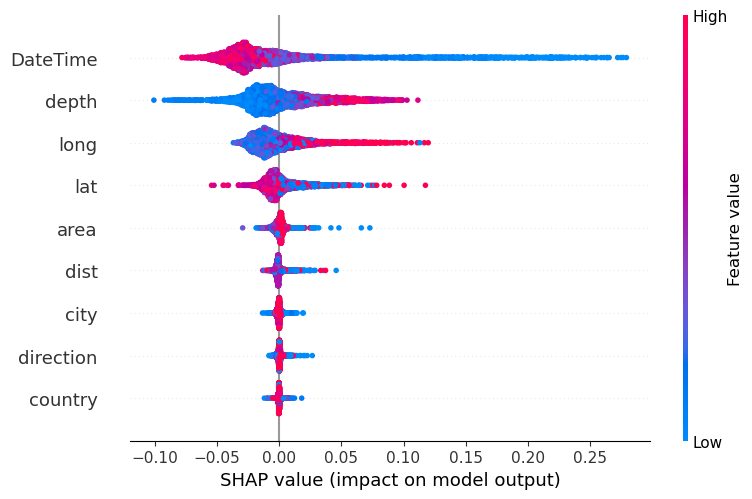

In [ ]:
# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=['DateTime', 'lat', 'long', 'country', 'city', 'area', 'direction', 'dist', 'depth'])